# Lesson 4
## Image Classification
##### going deeper into deeplearning stuffs

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)

In [2]:
from utils import *

In [3]:
print('total data', len((path/'images').ls()))
print("total classes", len((path/'annotations').ls()))


total data 7393
total classes 7


In [4]:
# we need to extract pets names from file name

fname_sample = (path/'images').ls()[0]
fname_sample.name

'Russian_Blue_242.jpg'

In [5]:
re.findall(r'(.+)_\d+.jpg$', fname_sample.name)

['Russian_Blue']

In [6]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=.75)
)

dls = pets.dataloaders(path/'images')

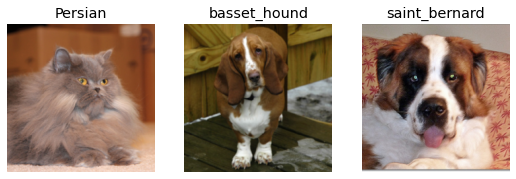

In [7]:
dls.valid.show_batch(max_n=3)

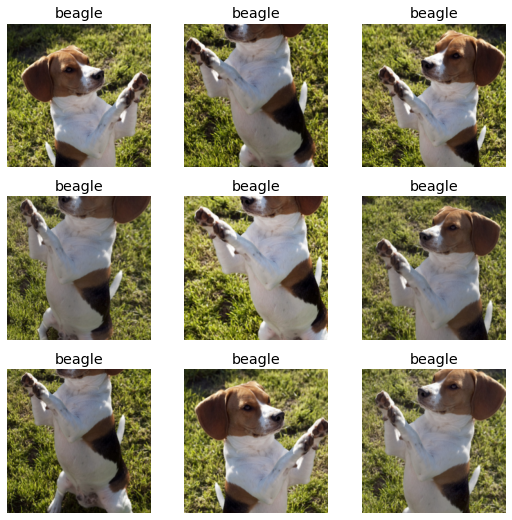

In [8]:
dls.train.show_batch(unique=True)

In [9]:
# dblock1 = DataBlock(blocks = (ImageBlock(), CategoryBlock()),
#                     get_y = parent_label,
#                     item_tfms= Resize(460),
#                    )

# dls1 = dblock1.dataloaders([(Path.cwd()/'datasets/bears/grizzly/00000171.jpg')] * 100, bs = 8)

# dls1.train.get_idxs = lambda: Inf.ones
# x, y = dls1.valid.one_batch()




### Checking and Debugging a DataBlock

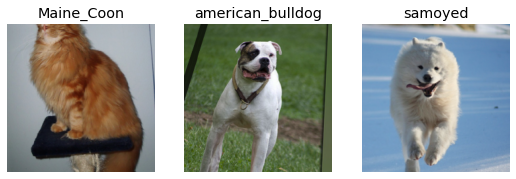

In [10]:
# step 1 check data

dls.show_batch(nrows=1, ncols=3)

In [11]:
# step 2 using Summary method

pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                     get_items = get_image_files,
                     splitter =  RandomSplitter(seed = 42),
                     get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name')
                 )
pets1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_58.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=334x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_58.jpg
    applying partial gives
      beagle
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(15)

Final sample: (PILImage mode=RGB size=334x500, TensorCategory(15))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: 

RuntimeError: stack expects each tensor to be equal size, but got [3, 500, 334] at entry 0 and [3, 500, 333] at entry 1

In [94]:
learn =  cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.526970,0.353837,0.115020,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.494924,0.311876,0.096076,01:00
1,0.324844,0.242044,0.082544,01:00


In [138]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

## Cross-entropy Loss

In [211]:
x, y = dls.one_batch()

In [212]:
dls.vocab[14]

'basset_hound'

In [213]:
y

TensorCategory([32, 35,  1, 18, 29, 17, 18, 20,  5, 19, 30, 23, 26, 23, 32,  1, 18, 36,  9, 22,  2, 29, 25, 18,  2, 31,  9, 14,  9,  8, 16, 33, 25,  6, 24,  2,  6, 20, 30,  5, 36,  0, 28, 15, 27, 25, 32,  9,
        24, 31,  2, 21, 26, 20,  2,  6, 25, 14, 31, 17, 31, 21, 18,  8], device='cuda:0')

In [214]:
preds, _ = learn.get_preds(dl = [dls.one_batch()])
preds[0]

tensor([1.5294e-06, 4.5324e-06, 2.3931e-05, 1.2452e-06, 1.3159e-06, 1.9651e-05, 6.9351e-06, 2.0319e-06, 1.5551e-05, 2.1299e-05, 1.1891e-05, 3.8533e-06, 5.8177e-05, 8.2358e-06, 5.9933e-06, 1.3234e-06,
        2.6521e-04, 6.8253e-06, 3.7742e-04, 9.9724e-01, 7.6610e-04, 3.9563e-04, 5.3181e-06, 1.5541e-05, 4.6255e-06, 1.2558e-04, 1.7537e-05, 1.5195e-04, 2.6652e-07, 1.7602e-06, 3.9736e-04, 2.7930e-06,
        2.1972e-05, 1.8987e-06, 4.0876e-06, 4.5387e-06, 2.2773e-06])

In [215]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

In [216]:
torch.random.manual_seed(42)

In [217]:
acts = torch.randn((6, 2))* 2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [218]:
acts.sigmoid()
# 1st columns 1st activation and 2nd too.
# but its not adding up>

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [219]:
diff = acts[:, 0] - acts[:, 1]
diff

tensor([ 0.4158,  0.0083, -1.8731,  5.6924,  0.3886, -0.5489])

In [220]:
diff.sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [221]:
torch.stack([diff.sigmoid(), 1-diff.sigmoid()], dim=1)

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [222]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=1, keepdim=True)

In [223]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [224]:
softmax(acts)

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [238]:
predicted_output = torch.tensor([0.02, -2.49, 1.25])

# softmax is exp(x)/sum(exp(x))

softmax_values = torch.exp(predicted_output)/torch.exp(predicted_output).sum()
print(softmax_values)

print(softmax_values.sum())

tensor([0.2221, 0.0180, 0.7599])
tensor(1.)


### Log Likelihood

In [239]:
targ = tensor([0, 1, 0, 1, 1, 0])

In [240]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [241]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [245]:
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()
df

,3,7,targ,idx,loss
0,0.602469,0.397531,0,0,0.602469
1,0.502065,0.497935,1,1,0.497935
2,0.133188,0.866811,0,2,0.133188
3,0.996640,0.003360,1,3,0.003360
4,0.595949,0.404051,1,4,0.404051
5,0.366118,0.633882,0,5,0.366118


In [265]:
targe = [0, 1, 3]
df1 = pd.DataFrame(a, columns=['1', '2', '3', '4'])
df1['target'] = targe
df1['idx'] = range(3)
df1['loss'] = a[range(3), targe]
df1

,1,2,3,4,target,idx,loss
0,0.133142,0.863978,-1.015675,-0.888749,0,0,0.133142
1,0.149780,-0.208894,-0.387021,0.991238,1,1,-0.208894
2,0.467903,-0.204932,-0.740907,0.361840,3,2,0.361840


In [254]:
a.shape

torch.Size([3, 4])

In [266]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [270]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [273]:
F.nll_loss??

# Taking the log

In [293]:
import math

In [297]:
y = 4 ** 2
print(y)
a = math.log(y, 4) 
a

16


2.0

In [305]:
math.log((2*4)) == math.log(2) + math.log(4)

True

In [316]:
loss_func = nn.CrossEntropyLoss()

loss_func(acts, targ)

tensor(1.8045)

In [317]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [318]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

In [325]:
okay()(4)

16

## Model interpretation

In [330]:
interp = ClassificationInterpretation.from_learner(learn)

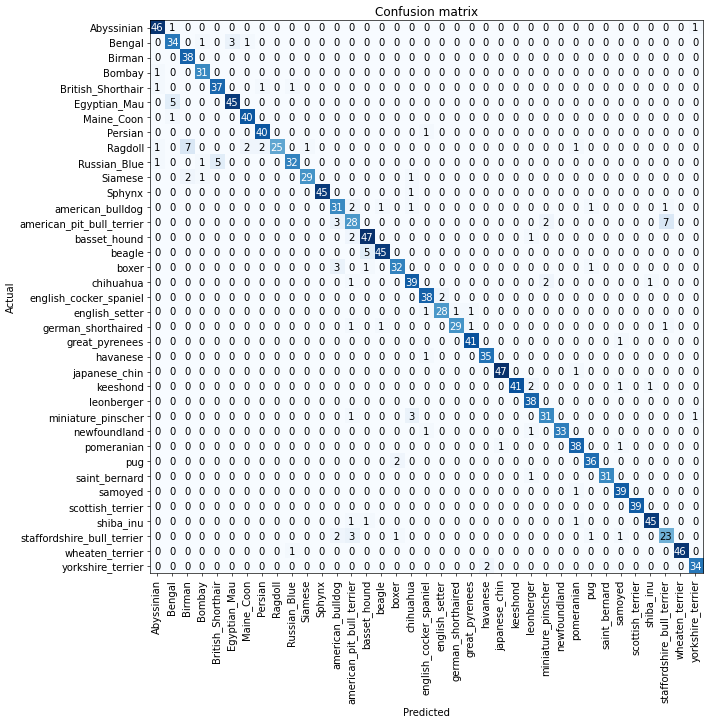

In [332]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [333]:
interp.most_confused(min_val=4)

[('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('beagle', 'basset_hound', 5)]

## Improving Our Model

### Learning Rate Finder

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [13]:
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.683774,4.865575,0.464141,01:04


epoch,train_loss,valid_loss,error_rate,time
0,3.277418,2.152924,0.437754,01:22


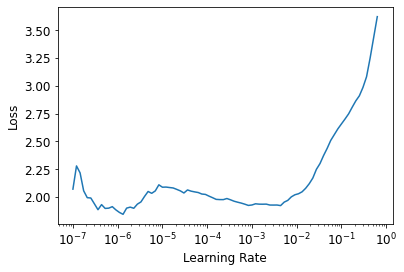

In [15]:
lr_min, lr_steep = learn.lr_find()

In [20]:
print(f"Minimum/10: {lr_min:.2e}, steepest ponit: {lr_steep:.2e}")

Minimum/10: 1.32e-07, steepest ponit: 7.59e-07


In [27]:
torch.T()

16673144796663267132

In [28]:
learn1 = cnn_learner(dls, resnet34, metrics=error_rate)

learn1.fine_tune(1,  base_lr=7.59e-07)

epoch,train_loss,valid_loss,error_rate,time
0,5.473694,4.427829,0.981055,01:04


epoch,train_loss,valid_loss,error_rate,time
0,5.407204,4.404439,0.979026,01:22


## Unfreezing and transfer learning

In [12]:
learn.fine_tune??

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [11]:
learn.fit_one_cycle(3, 7.59e-07)

epoch,train_loss,valid_loss,error_rate,time
0,5.142847,4.073985,0.959405,00:42
1,5.111766,4.063082,0.956698,00:43
2,5.089405,4.042207,0.958728,00:43


In [13]:
learn.unfreeze()

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=0.0020892962347716093)

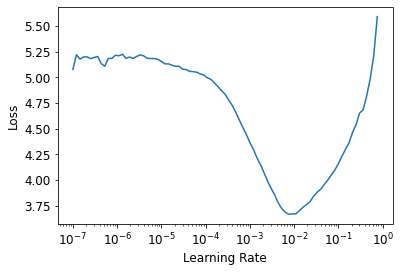

In [14]:
learn.lr_find()

In [27]:
learn.fit_one_cycle(5, lr_max = slice(1e-1, 1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,4.435424,5.878930,0.958728,00:51
1,4.347369,6.548694,0.960758,00:51
2,3.978172,3.940347,0.873478,00:52
3,3.623542,2.646881,0.730717,00:52
4,3.208916,2.506902,0.699594,00:52


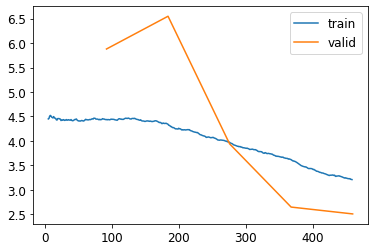

In [28]:
learn.recorder.plot_loss()